## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import sys
from pathlib import Path

_ = Path().resolve().parent.parent # Add [...]\MS960_MachineLearning\Projeto2 to PYTHONPATH
sys.path.insert(0, str(_))

from Projeto2.neural_network.neural import *
from Projeto2.neural_network.plots import *
from Projeto2.run import cfg

In [2]:
data_folder   = "../data/test"
data_corrects = "../data/corrects"
res_folder  = "../data/results/best/"

df_images = pd.read_csv(f"{data_folder}/images.csv", index_col=0)
df_labels = pd.read_csv(f"{data_folder}/labels.csv", index_col=0)

ratio    = pd.read_csv(f"{data_corrects}/ratio.csv", index_col=0)
cost     = pd.read_csv(f"{data_corrects}/cost.csv", index_col=0)
corrects = pd.read_csv(f"{data_corrects}/corrects.csv", index_col=0)

total_costs = pd.read_csv(res_folder+"costs.csv", index_col=0)
thetas_12   = pd.read_csv(res_folder+"thetas_12.csv", index_col=0)
thetas_23   = pd.read_csv(res_folder+"thetas_23.csv", index_col=0)

In [3]:
ratio

,correto
1,87.7
0,12.3


In [4]:
corrects

,correto,original,atribuido
image_5,1,10,10
image_15,1,10,10
image_16,1,10,10
image_19,1,10,10
image_23,1,10,10
...,...,...,...
image_4982,1,9,9
image_4989,1,9,9
image_4990,1,9,9
image_4993,1,9,9


<AxesSubplot:xlabel='atribuido', ylabel='Count'>

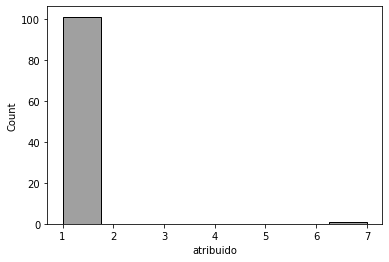

In [5]:
sns.histplot(corrects.query("original == 1")['atribuido'], color = 'grey')

## MATRIZ DE CONFUSÃO

In [6]:
conf_matrix = pd.DataFrame( confusion_matrix( corrects['original'], corrects['atribuido'] )  )
conf_matrix.columns = cfg.LABELS
conf_matrix.index   = conf_matrix.columns
conf_matrix.insert(0, 'true/pred', 10*['-'])
conf_matrix

,true/pred,1,2,3,4,5,6,7,8,9,10
1,-,101,0,0,0,0,0,1,0,0,0
2,-,3,78,1,0,0,3,1,0,0,1
3,-,1,1,86,0,1,0,1,3,0,0
4,-,1,3,0,71,0,2,2,2,11,0
5,-,0,0,6,2,78,1,0,9,0,2
6,-,1,4,0,1,4,99,2,0,0,1
7,-,8,2,1,1,0,0,85,0,8,1
8,-,3,1,1,1,2,1,0,82,4,0
9,-,1,1,2,9,1,0,3,0,97,0
10,-,0,0,0,0,0,0,1,0,0,100


## ERROS DE ATRIBUIÇÃO

In [21]:
%%capture out

orig  = 9
given = 4
_ = corrects.query("original == @orig & atribuido == @given")

figs = multiple_gen_image(df_images[_.index], _, figsize=(16,16))

figs[0].savefig(f"{data_corrects}/orig_{orig}_given_{given}.png", dpi=600)

In [9]:
print(f"NUMBER OF PAGES: {len(figs)}")

NUMBER OF PAGES: 1


## THETAS ENTRE AS CAMADAS 1 e 2

In [11]:
thetas_12.iloc[1:]

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
theta_x1,-0.000013,0.000001,0.000032,-0.000009,5.458125e-06,-0.000018,0.000021,0.000004,0.000027,-0.000032,...,0.000030,-1.170691e-05,-0.000013,3.451644e-05,2.478121e-05,0.000009,-9.072611e-06,-0.000020,0.000032,-3.306704e-05
theta_x2,0.000019,0.000026,-0.000031,0.000023,-1.785063e-05,0.000001,-0.000004,-0.000011,-0.000034,0.000036,...,-0.000006,1.789411e-05,0.000009,6.921554e-06,2.253150e-05,0.000013,3.229780e-05,-0.000004,-0.000015,-2.064584e-05
theta_x3,-0.000013,-0.000034,-0.000031,-0.000020,2.363230e-05,0.000030,0.000008,0.000021,0.000013,0.000011,...,0.000018,-1.487954e-05,-0.000003,-3.040149e-05,3.307472e-05,0.000024,1.471482e-05,0.000031,0.000003,3.445495e-05
theta_x4,0.000016,-0.000016,0.000013,-0.000008,1.943825e-06,-0.000015,0.000029,-0.000007,-0.000033,0.000018,...,-0.000018,-2.122465e-05,-0.000028,-1.440036e-05,-2.838498e-05,0.000029,1.358751e-05,-0.000034,0.000020,2.694065e-06
theta_x5,-0.000030,0.000027,0.000028,-0.000021,1.951189e-05,-0.000027,0.000014,-0.000002,0.000010,-0.000019,...,-0.000012,2.929543e-08,0.000006,-2.186749e-05,3.229781e-05,-0.000029,2.670909e-05,0.000022,0.000021,-1.370696e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
theta_x396,0.000025,-0.000027,0.000087,0.000074,-1.320258e-07,-0.000078,-0.000096,-0.000092,-0.000014,0.000078,...,-0.000071,4.794076e-05,0.000048,-4.006128e-05,-2.575691e-05,0.000070,1.525251e-07,-0.000027,0.000008,-1.580483e-05
theta_x397,0.000140,-0.000146,0.000217,0.000158,1.993718e-05,-0.000236,-0.000249,-0.000262,0.000067,0.000213,...,-0.000239,1.385870e-04,0.000052,-1.700056e-05,4.462178e-07,0.000089,-1.839975e-05,0.000128,-0.000083,-4.428218e-05
theta_x398,0.000019,0.000045,-0.000036,-0.000027,2.969651e-05,0.000038,0.000052,0.000017,-0.000020,-0.000018,...,-0.000012,-1.007768e-05,0.000014,-4.152655e-07,-2.535252e-05,-0.000018,1.568975e-05,0.000018,-0.000030,-3.061341e-06
theta_x399,0.000014,-0.000020,0.000004,-0.000016,-1.545734e-06,0.000033,0.000035,0.000018,0.000033,0.000020,...,0.000013,-2.923385e-07,0.000023,-4.454993e-07,-1.438844e-05,0.000012,-7.368823e-06,0.000015,0.000029,3.018945e-05


In [12]:
columns = thetas_12.iloc[1:].columns
index   = thetas_12.iloc[1:].index

scaler = StandardScaler()
scaled = scaler.fit_transform(thetas_12.iloc[1:])
scaled = pd.DataFrame(scaled, columns=columns, index=index)
scaled

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
theta_x1,-0.111764,-0.197982,-0.046846,0.000020,-0.147571,-0.046101,0.012041,-0.036273,-0.011508,-0.050013,...,0.095616,-0.069816,0.053151,-0.026756,0.064824,-0.089713,-0.110408,0.073902,-0.037162,0.087253
theta_x2,-0.111565,-0.197762,-0.047269,0.000203,-0.147751,-0.045980,0.011896,-0.036345,-0.011834,-0.049658,...,0.095416,-0.069629,0.053297,-0.026967,0.064810,-0.089679,-0.110120,0.073998,-0.037395,0.087331
theta_x3,-0.111764,-0.198289,-0.047268,-0.000042,-0.147431,-0.045802,0.011968,-0.036191,-0.011582,-0.049789,...,0.095547,-0.069836,0.053218,-0.027252,0.064876,-0.089585,-0.110243,0.074205,-0.037305,0.087677
theta_x4,-0.111582,-0.198136,-0.046972,0.000030,-0.147598,-0.046079,0.012083,-0.036329,-0.011826,-0.049755,...,0.095351,-0.069876,0.053048,-0.027130,0.064487,-0.089545,-0.110250,0.073822,-0.037222,0.087478
theta_x5,-0.111869,-0.197754,-0.046870,-0.000045,-0.147463,-0.046156,0.011999,-0.036302,-0.011595,-0.049945,...,0.095384,-0.069742,0.053280,-0.027187,0.064872,-0.090024,-0.110159,0.074149,-0.037216,0.087375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
theta_x396,-0.111527,-0.198227,-0.046475,0.000496,-0.147614,-0.046468,0.011372,-0.036746,-0.011722,-0.049442,...,0.095060,-0.069439,0.053559,-0.027326,0.064504,-0.089214,-0.110344,0.073861,-0.037280,0.087362
theta_x397,-0.110810,-0.199281,-0.045597,0.000979,-0.147459,-0.047438,0.010491,-0.037578,-0.011289,-0.048744,...,0.094142,-0.068866,0.053588,-0.027150,0.064670,-0.089058,-0.110473,0.074771,-0.037731,0.087183
theta_x398,-0.111564,-0.197597,-0.047306,-0.000081,-0.147384,-0.045753,0.012220,-0.036212,-0.011755,-0.049938,...,0.095386,-0.069806,0.053330,-0.027023,0.064507,-0.089933,-0.110236,0.074129,-0.037468,0.087441
theta_x399,-0.111593,-0.198166,-0.047032,-0.000016,-0.147625,-0.045786,0.012121,-0.036206,-0.011474,-0.049741,...,0.095521,-0.069744,0.053395,-0.027023,0.064576,-0.089684,-0.110396,0.074109,-0.037177,0.087650


In [1]:
thetas_12

NameError: name 'thetas_12' is not defined

In [13]:
%%capture out

figs = plot_thetas(scaled, figsize=(16,16), nrows=5, ncols=5)

In [14]:
len(figs)

1

In [18]:
figs[0].savefig(f'{data_corrects}/thetas_plot.png' , dpi=600 )